### Importamos las librerias necesarias

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

### Diseño estandar de graficas

In [59]:
sns.set(
    style="whitegrid",
    context="notebook",
    palette="dark",
)

### Cargando datos

In [60]:
data = pd.read_csv('../data/drug200.csv')

In [61]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Analizando los datos

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [63]:
data.shape

(200, 6)

In [64]:
data.duplicated().sum()

0

 Busqueda de datos nulos

In [65]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Numero de clases

In [66]:
data.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Drug'>

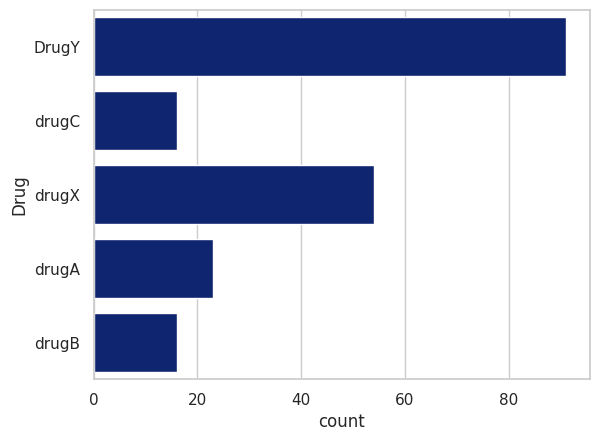

In [67]:
sns.countplot(data.Drug)

Normalmente, cuando a los modelos de clasificación se les ingesta un conjunto de datos que cuentan con un desequilibrio en el número de clases, tienden a presentar problemas, ya que el modelo de clasificación tendrá dificultades para aprender y predecir correctamente la clase minoritaria. En este caso, no podemos abordar el problema con la eliminación de instancias que pertenecen a la clase con mayor número debido a que no se cuenta con suficientes datos. Posteriormente, se verán otras posibles soluciones para abordar este problema con la selección de modelos de aprendizaje automático.

### Procesamiento de datos

In [68]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [69]:
encoder = OrdinalEncoder()
data_categoric = data[["Sex", "BP", "Cholesterol", "Drug"]]
data_categoric = encoder.fit_transform(data_categoric.values.reshape(-1, 4))

In [70]:
# nesecito ver los valores asignados a cada categoria
encoder.categories_


[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)]

In [71]:
data_categoric = pd.DataFrame(data_categoric)
data_categoric.columns = data[["Sex", "BP", "Cholesterol", "Drug"]].columns
data_categoric = data_categoric.astype(int)

In [72]:
data[["Sex", "BP", "Cholesterol", "Drug"]] = data_categoric
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


### Visualzacion de correlacion 

<Axes: >

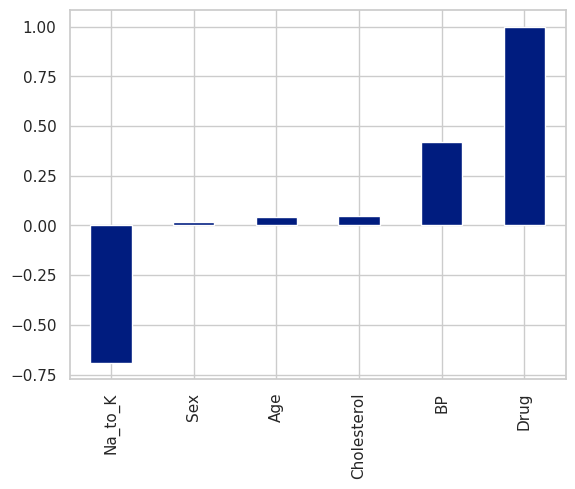

In [73]:
data.corr()["Drug"].sort_values(ascending=True).plot(kind="bar") # <-- Generando grafico 

<Axes: >

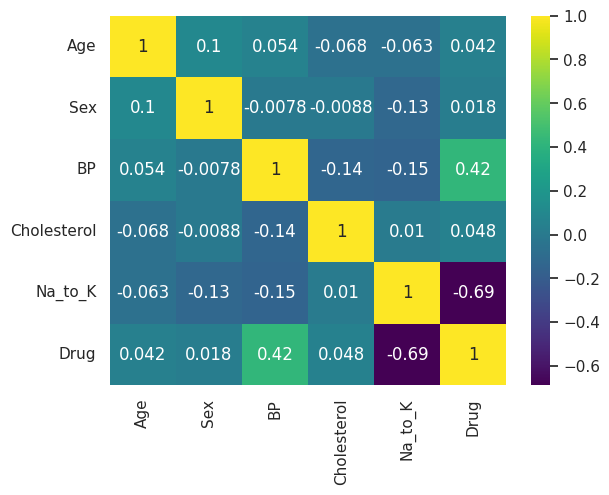

In [74]:
sns.heatmap(data.corr(), annot=True, cmap="viridis")

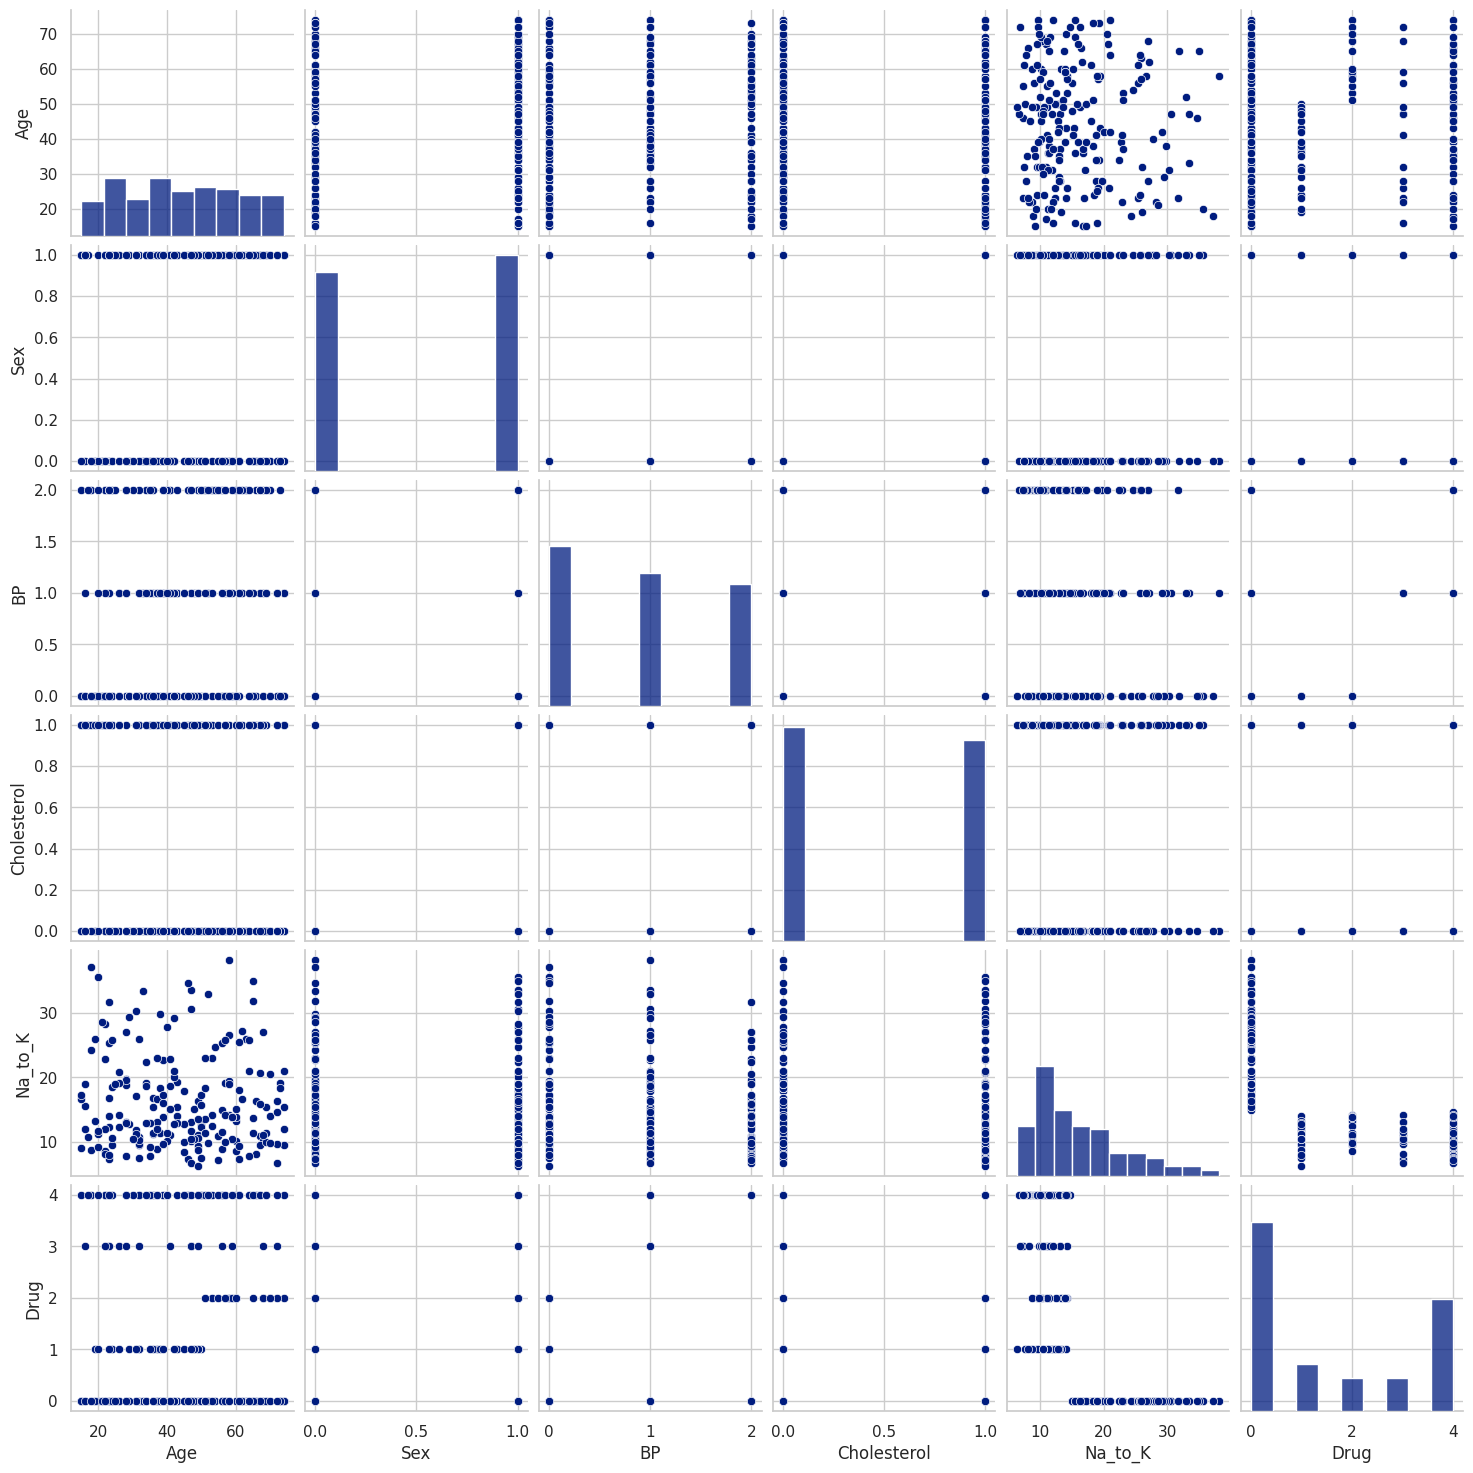

In [95]:
sns.pairplot(data)

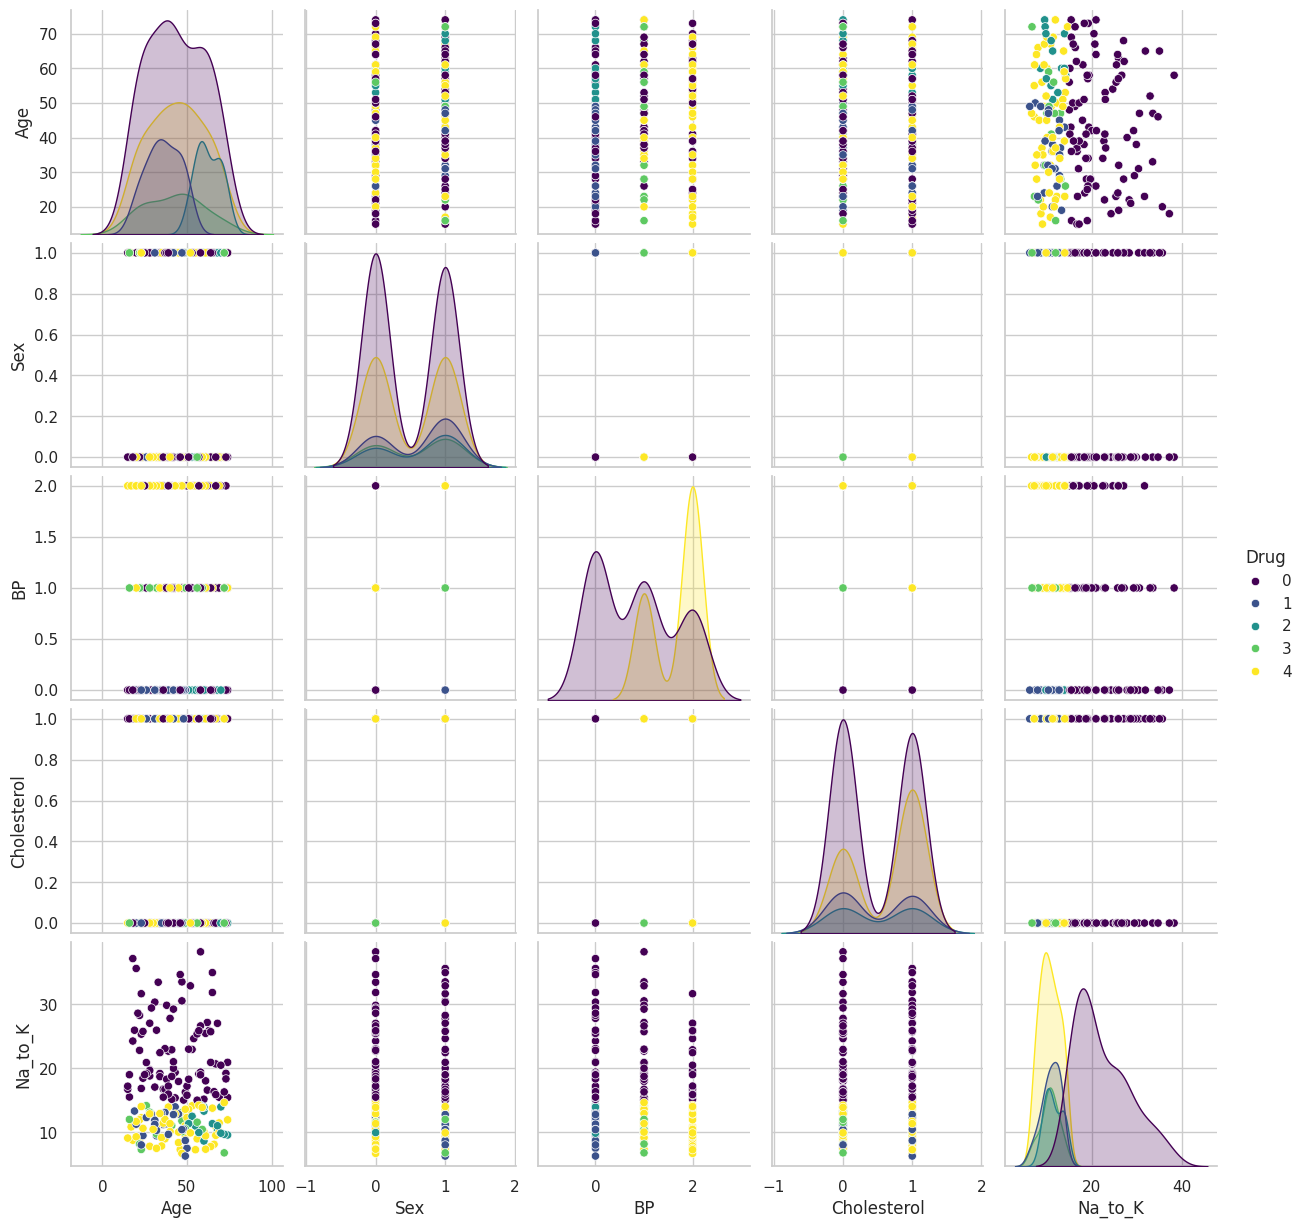

In [96]:
sns.pairplot(data, hue="Drug", palette="viridis")

### Split y Escalamiento de datos

In [75]:
X = data.drop("Drug", axis=1)
Y = data["Drug"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True , random_state=42)

scaler_x = MinMaxScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)



In [77]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el ensamblaje
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': range(2,9),  # Profundidad máxima de los árboles
    'subsample': [0.8, 0.9, 1.0],  # Fracción de muestras a utilizar para ajustar cada árbol
    'max_features': ['auto', 'sqrt', 'log2', None]  # Número máximo de características a considerar en cada división
}
    
param_lr = {

    'C': [0.01, 0.1, 1],  # Valores de hiperparámetro 'C'
    'penalty': ['l2','l1'], # Tipos de penalización
    'solver': ['sag','saga'],
    'multi_class':["ovr","multinomial"],    
}

In [78]:
model_gradient = GradientBoostingClassifier()
model_lr = LogisticRegression()

El parámetro `n_jobs` en GridSearchCV y otros estimadores en scikit-learn controla la cantidad de procesadores que se utilizan para ejecutar paralelamente los cálculos durante la validación cruzada y el ajuste de modelos. Específicamente, cuando n_jobs está configurado en -1, scikit-learn utilizará todos los núcleos disponibles en tu CPU para procesar tareas en paralelo.

In [79]:
grid_search_gradient = GridSearchCV(
    estimator=model_gradient,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=3,
    scoring='accuracy'
    )

In [80]:
grid_search_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=param_lr,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
    )

In [81]:
grid_search_lr.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....C=0.01, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s


[CV] END ....C=0.01, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.01, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.01, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01

/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: Conver

[CV] END ......C=1, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=1, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1,

/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: Conver

[CV] END C=1, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.1, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.1, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.1, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s[CV] END C=0.01, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s

[CV] END C=0.01, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.1, multi_class=ovr, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.1, multi_class=ovr, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.1, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.1, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] E

/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2', 'l1'], 'solver': ['sag', 'saga']},
             scoring='accuracy', verbose=2)

In [82]:
grid_search_lr.best_score_

0.90625

In [83]:
grid_search_lr.best_params_

{'C': 1, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

In [84]:
model_lr = grid_search_lr.best_estimator_

In [85]:
grid_search_gradient.fit(X_train, Y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


[CV 4/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=0.9;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=1.0;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=0.8;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=0.9;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=1.0;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=0.9;, score=nan total time=   0.0s[CV 5/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=1.0;, score=nan total time=   0.0s

[CV 1/5] END learning_rate=0.01, max_depth=2, max_features=auto, n_estimators=50, subsample=1.0;, score=nan tot

/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
945 fits failed out of a total of 3780.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
544 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cristian/Data_Science/Proyect_ciencia _datos/env/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/cristian/Data_Science/Proyect_ciencia _datos/

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': range(2, 9),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=3)

In [86]:
grid_search_gradient.best_score_

0.99375

In [87]:
grid_search_gradient.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 100,
 'subsample': 0.9}

In [88]:
model_grad = grid_search_gradient.best_estimator_

### Evaluando a los modelos 

In [89]:
Y_pred_train_lr = model_lr.predict(X_train)
Y_pred_train_grad = model_grad.predict(X_train)

print(f"Accuracy Logistic Regression: {accuracy_score(Y_train, Y_pred_train_lr)}")
print(f"Accuracy Gradient Boosting: {accuracy_score(Y_train, Y_pred_train_grad)}")

Accuracy Logistic Regression: 0.94375
Accuracy Gradient Boosting: 1.0


In [93]:
y_pred_lr = model_lr.predict(X_test)
y_pred_grad = model_grad.predict(X_test)

print(f"Accuracy Logistic Regression: {accuracy_score(Y_test, y_pred_lr)*100} %")
print(f"Accuracy Gradient Boosting: {accuracy_score(Y_test, y_pred_grad)*100} %")

Accuracy Logistic Regression: 97.5 %
Accuracy Gradient Boosting: 100.0 %


Los resultados de las metricas del modelo indica que el **Gradient Boosting** tiene overfitting y no logra generalizar bien los datos, en cambio el modelo de regression lineal logro tener resultado de metricas considerablemente bien, por tal razon, se usara el modelo de regression lineal

### Matriz de confusion

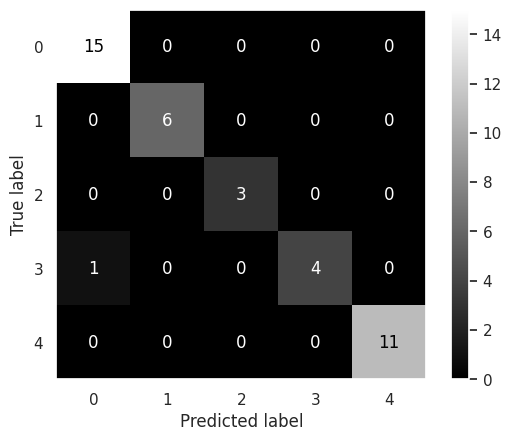

In [101]:
cm = confusion_matrix(Y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot(cmap="gray")
plt.grid(False)